# Sommaire



# Importation des librairies

In [1]:
import pandas as pd
import plotly.express as px  # visualisation
import plotly.graph_objs as go 
import plotly.offline as py 
from plotly.figure_factory import create_table  # création d'une table interactive
from plotly.subplots import make_subplots

# Chargement des données

Nous allons utiliser, Le dataset **Gapminder** qui est un grand classique pour illustrer les principes des bibliothèques graphiques. Les données comportent les variables suivantes (selon la source utilisée vous ne retrouverez pas toutes les variables):

- `country` : nom du pays
- `continent` : nom du continent
- `year` : année
- `lifeExp` : espérance de vie à la naissance
- `pop` : population globale
- `gdpPercap` : le PIB par habitant en $
- `mortality` : la mortalité infantile (pour mille naissances)
- `fertility` : le nombre d’enfant par femme
- `centroid_lon` : longitude
- `centroid_lat` : latitude

Pour plus de détails, vous pouvez vous reférer [ici](https://www.gapminder.org/data/)

## Option 1: Fichier

In [51]:
# chargement des données
data = pd.read_csv("https://github.com/MouslyDiaw/dashboard_python/blob/master/gapminder.csv?raw=true",
                   sep=",",
                   dtype={"year": "str"},  # str: string
                  )
# ou le caster après chargement
# data["year"] = data.year.astype(str)
data.shape

(1680, 8)

In [52]:
# allure générale (les premières lignes)
data.head()

country  year         pop continent  lifeExp  gdpPercap  mortality  \
0  Afghanistan  1952   8425333.0      Asia   28.801    779.445        NaN   
1  Afghanistan  1957   9240934.0      Asia   30.332    820.853        NaN   
2  Afghanistan  1962  10267083.0      Asia   31.997    853.101      236.3   
3  Afghanistan  1967  11537966.0      Asia   34.020    836.197      217.0   
4  Afghanistan  1972  13079460.0      Asia   36.088    739.981      198.2   

   fertility  
0      7.671  
1      7.671  
2      7.671  
3      7.671  
4      7.671

In [53]:
# Avant de manipuler un dataset, il est indispensable d’analyser sa structure (type de variables)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1680 non-null   object 
 1   year       1680 non-null   object 
 2   pop        1680 non-null   float64
 3   continent  1680 non-null   object 
 4   lifeExp    1680 non-null   float64
 5   gdpPercap  1680 non-null   float64
 6   mortality  1458 non-null   float64
 7   fertility  1680 non-null   float64
dtypes: float64(5), object(3)
memory usage: 105.1+ KB


In [54]:
# quelques statistiques
data.describe(include="all")

country  year           pop continent      lifeExp      gdpPercap  \
count          1680  1680  1.680000e+03      1680  1680.000000    1680.000000   
unique          140    12           NaN         5          NaN            NaN   
top     Afghanistan  1952           NaN    Africa          NaN            NaN   
freq             12   140           NaN       612          NaN            NaN   
mean            NaN   NaN  2.998615e+07       NaN    59.323095    7167.495338   
std             NaN   NaN  1.068643e+08       NaN    12.910554    9846.073969   
min             NaN   NaN  6.001100e+04       NaN    23.599000     241.166000   
25%             NaN   NaN  2.829359e+06       NaN    48.077250    1189.067750   
50%             NaN   NaN  7.271770e+06       NaN    60.386500    3474.232000   
75%             NaN   NaN  1.994372e+07       NaN    70.796250    9316.721250   
max             NaN   NaN  1.318683e+09       NaN    82.603000  113523.133000   

          mortality    fertility  
count   1458.000000  1680.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      68.506107     4.641047  
std       54.043530     2.078144  
min        2.200000     1.100000  
25%       21.225000     2.570750  
50%       57.350000     5.069500  
75%      105.750000     6.536750  
max      273.200000     9.185000

## Option 2: Plotly dataset

In [56]:
px.data.gapminder?

Signature:
px.data.gapminder(
    datetimes=False,
    centroids=False,
    year=None,
    pretty_names=False,
)
Docstring:
Each row represents a country on a given year.

https://www.gapminder.org/data/

Returns:
    A `pandas.DataFrame` with 1704 rows and the following columns:
    `['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
    'iso_alpha', 'iso_num']`.
    If `datetimes` is True, the 'year' column will be a datetime column
    If `centroids` is True, two new columns are added: ['centroid_lat', 'centroid_lon']
    If `year` is an integer, the dataset will be filtered for that year
File:      ~/opt/anaconda3/envs/python39/lib/python3.9/site-packages/plotly/data/__init__.py
Type:      function


In [70]:
# chargement des données
data_gapminder = px.data.gapminder(datetimes=False, centroids=True)
data_gapminder.shape

(1704, 10)

In [71]:
# allure générale (les premières lignes)
data_gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  centroid_lon  centroid_lat  
0        4          65.0          33.0  
1        4          65.0          33.0  
2        4          65.0          33.0  
3        4          65.0          33.0  
4        4          65.0          33.0

In [63]:
# Avant de manipuler un dataset, il est indispensable d’analyser sa structure (type de variables)
data_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1704 non-null   object 
 1   continent     1704 non-null   object 
 2   year          1704 non-null   int64  
 3   lifeExp       1704 non-null   float64
 4   pop           1704 non-null   int64  
 5   gdpPercap     1704 non-null   float64
 6   iso_alpha     1704 non-null   object 
 7   iso_num       1704 non-null   int64  
 8   centroid_lon  1704 non-null   float64
 9   centroid_lat  1704 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 133.2+ KB


In [10]:
# quelques statistiques
data_gapminder.describe(include="all", datetime_is_numeric=True)

country continent        year      lifeExp           pop  \
count          1704      1704  1704.00000  1704.000000  1.704000e+03   
unique          142         5         NaN          NaN           NaN   
top     Afghanistan    Africa         NaN          NaN           NaN   
freq             12       624         NaN          NaN           NaN   
mean            NaN       NaN  1979.50000    59.474439  2.960121e+07   
std             NaN       NaN    17.26533    12.917107  1.061579e+08   
min             NaN       NaN  1952.00000    23.599000  6.001100e+04   
25%             NaN       NaN  1965.75000    48.198000  2.793664e+06   
50%             NaN       NaN  1979.50000    60.712500  7.023596e+06   
75%             NaN       NaN  1993.25000    70.845500  1.958522e+07   
max             NaN       NaN  2007.00000    82.603000  1.318683e+09   

            gdpPercap iso_alpha      iso_num  centroid_lon  centroid_lat  
count     1704.000000      1704  1704.000000   1704.000000   1704.000000  
unique            NaN       141          NaN           NaN           NaN  
top               NaN       KOR          NaN           NaN           NaN  
freq              NaN        24          NaN           NaN           NaN  
mean      7215.327081       NaN   425.880282     16.873370     17.430002  
std       9857.454543       NaN   248.305709     56.887474     24.107592  
min        241.165876       NaN     4.000000   -105.795982    -41.000000  
25%       1202.060309       NaN   208.000000     -8.000000      2.000000  
50%       3531.846989       NaN   410.000000     19.166650     15.750000  
75%       9325.462346       NaN   638.000000     43.166700     36.000000  
max     113523.132900       NaN   894.000000    174.000000     65.000000

**Pour la suite du TP, nous allons utiliser le dataset de plotly.**

In [72]:
# créer un sous ensemble de données pour les données sur l'Asie en 1992:
france_data = data_gapminder.query("country =='France'")
france_data.shape

(12, 10)

In [73]:
france_data.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
528  France    Europe  1952    67.41  42459667   7029.809327       FRA   
529  France    Europe  1957    68.93  44310863   8662.834898       FRA   
530  France    Europe  1962    70.51  47124000  10560.485530       FRA   
531  France    Europe  1967    71.55  49569000  12999.917660       FRA   
532  France    Europe  1972    72.38  51732000  16107.191710       FRA   

     iso_num  centroid_lon  centroid_lat  
528      250           2.0          46.0  
529      250           2.0          46.0  
530      250           2.0          46.0  
531      250           2.0          46.0  
532      250           2.0          46.0

# Graphique élémentaire

Un graphique plotly est un objet [Figure](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html) comprenant a minima deux attributs:

- `data` : une séquence de traces contenant les données à afficher. Ex : [`Scatter(...)`, `Bar(...)`]

- `layout` : un dictionnaire de paires clé/valeur déterminant titre, légende, axes, etc…

Construire un graphique consiste donc à construire ces deux attributs.

## Diagramme en barre
https://plotly.com/python/bar-charts/

In [13]:
# Exemple basic avec une liste de valeurs
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

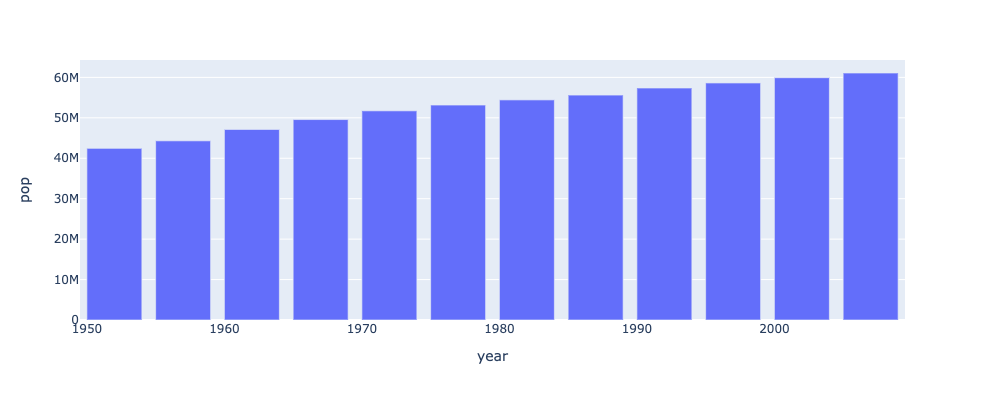

In [14]:
# avec les données de gapminder
fig = px.bar(france_data, x='year', y='pop', height=400)
fig.show()

In [74]:
px.bar?

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a bar plot, each row of `data_frame` is represe

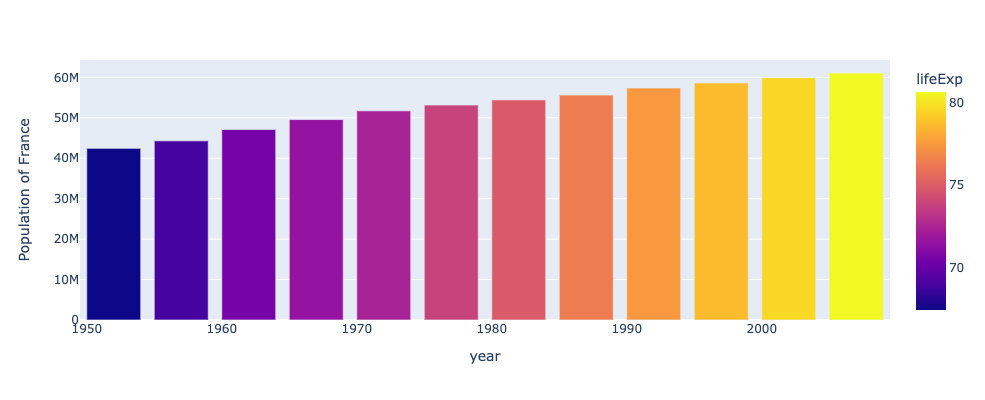

In [78]:
# let's add color by lifeExp and other parameters 
fig = px.bar(france_data, x='year', y='pop', color='lifeExp',
             labels={'pop': 'Population of France'},
             height=400,
            )
fig.show()

In [16]:
data_gapminder.query("year == 2007")["pop"].describe()

count    1.420000e+02
mean     4.402122e+07
std      1.476214e+08
min      1.995790e+05
25%      4.508034e+06
50%      1.051753e+07
75%      3.121004e+07
max      1.318683e+09
Name: pop, dtype: float64

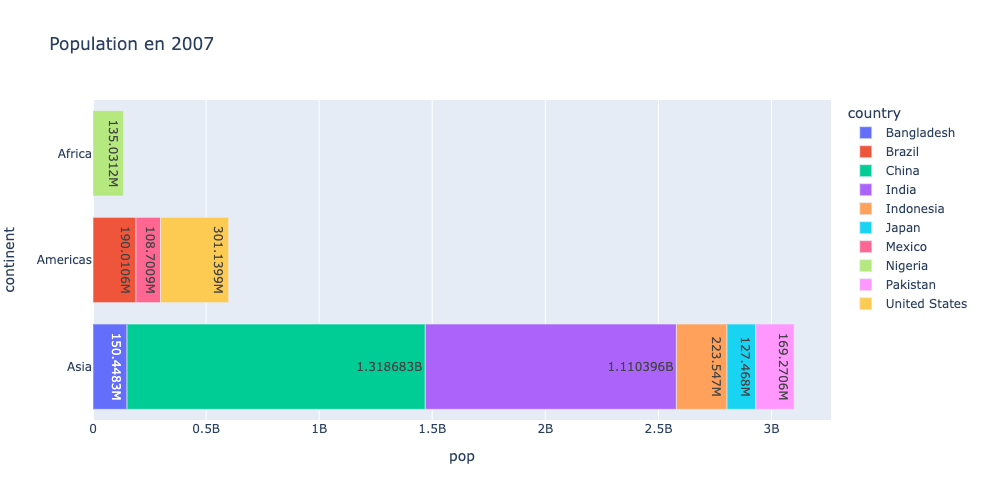

In [81]:
fig = px.bar(data_gapminder.query("year == 2007 and pop > 1e8"),
             y="continent", x="pop", color="country",
             barmode='relative',  # group, relative, overlay
             text_auto=True,
             title="Population en 2007",
             height=500,
            )
fig.show()

### Exercice

1. Créez un graphique en barre représentant la moyenne de la variable `pop` pour chaque continent
2. Ajoutez des `couleurs par continent`
3. `Explorer` les interactions possibles (zoom, labels, …)
4. Créez un graphique en barre pour afficher l'*espérance de vie moyenne*, `entre 1997 et 2007`, des `top 10` en Europe.


**Temps imparti: 20 mins** 


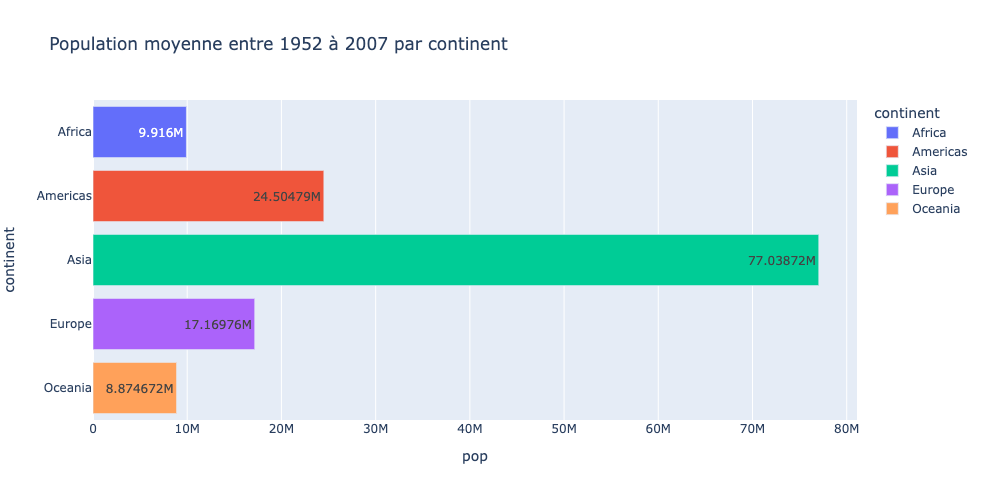

In [92]:
# Créez un graphique en barre représentant la moyenne de la variable pop pour chaque continent
# calcul de la moyenne par continent
data_continent_avg_pop = data_gapminder.groupby("continent", as_index=False)["pop"].mean()

# graphique
fig = px.bar(data_continent_avg_pop,
             y="continent", x="pop", color="continent",
             text_auto=True,
             title="Population moyenne entre 1952 à 2007 par continent",
             height=500,
            )
fig.show()

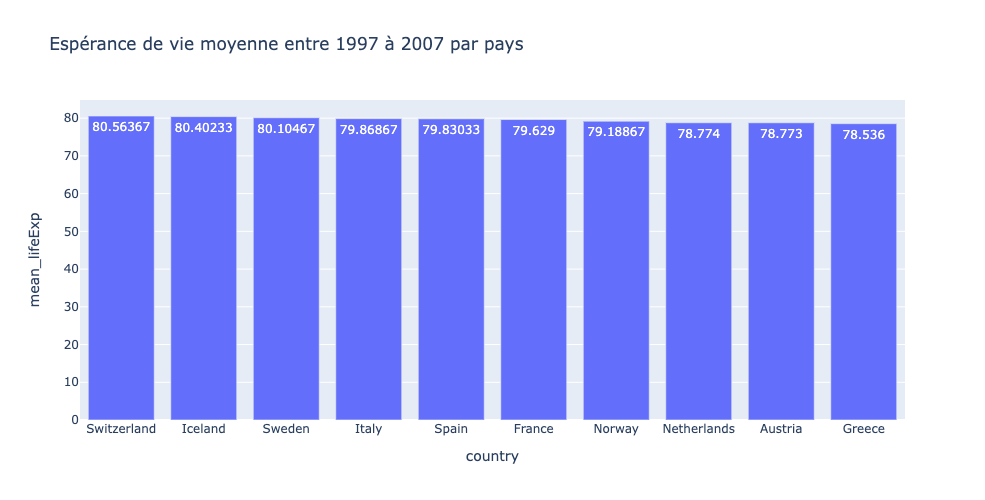

In [105]:
# 4. Créez un graphique en barre pour afficher l'espérance de vie moyenne, `entre 1997 et 2007`, des `top 10` en Europe.

# calcul de la moyenne de l'espérance de vie par pays entre 1997 et 2007
data_europe_top_lifeexp = (data_gapminder
                           .query("continent == 'Europe' and year>= 1997 and year <= 2007")
                           .groupby("country", as_index=False)
                           .agg(mean_lifeExp=("lifeExp", "mean"))
                           .nlargest(columns="mean_lifeExp", n=10)
                          )
# graphique
fig = px.bar(data_frame=data_europe_top_lifeexp,
             x="country", y="mean_lifeExp",
             text_auto=True,
             title="Espérance de vie moyenne entre 1997 à 2007 par pays",
             height=500,
            )
fig.show()

## Nuage de points

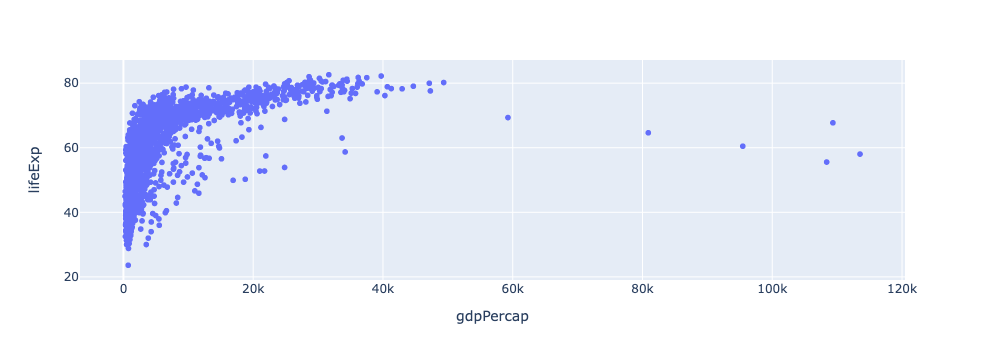

In [18]:
# create scatter plot
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp')
fig.show()

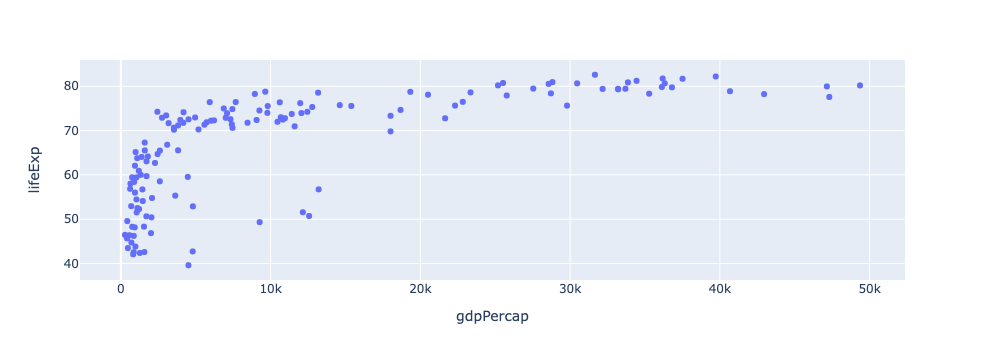

In [107]:
# # filter 2007 data only from dataset
fig = px.scatter(data_gapminder.query("year == 2007"), x="gdpPercap", y="lifeExp")
fig.show()

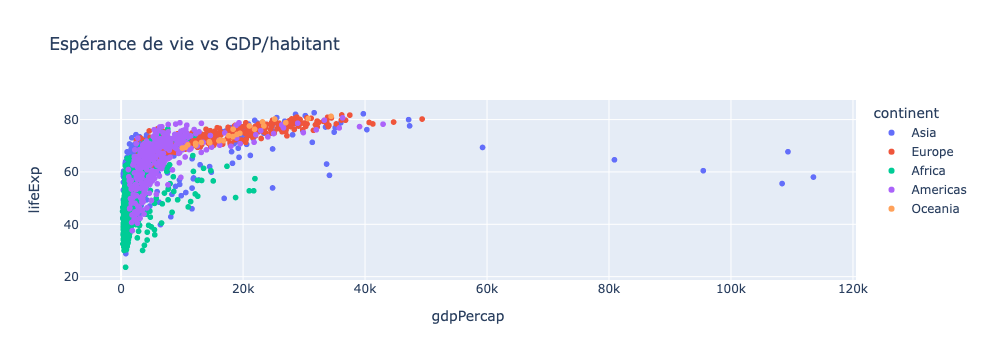

In [109]:
# color by continent
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp',
                 color='continent',
                 title="Espérance de vie vs GDP/habitant"
                )
fig.show()

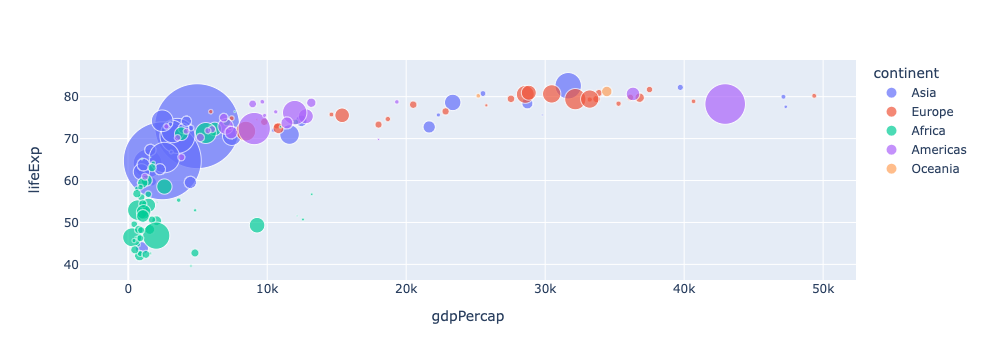

In [110]:
# create a bubble chart 
fig = px.scatter(data_gapminder.query("year == 2007"), x='gdpPercap', y='lifeExp', color='continent',
                 size='pop', size_max=60,
                 hover_name='country',  # informations de survol (pop-ups)
                )
fig.show()

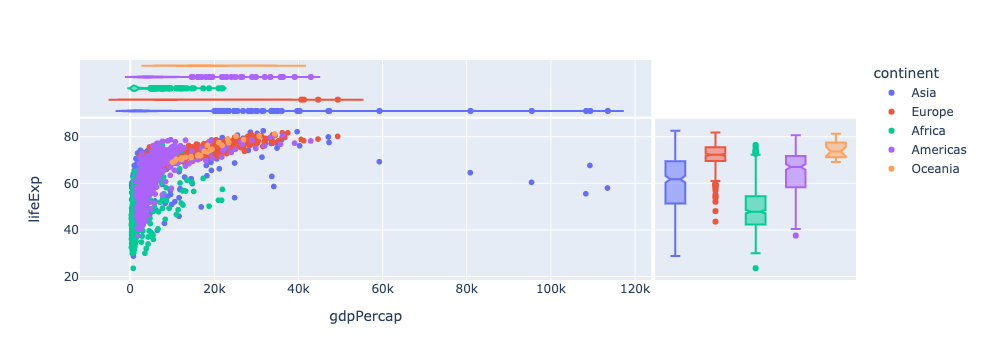

In [112]:
# color by continent
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp', color='continent',
                 marginal_y="box",
                 marginal_x="violin",
                )
fig.show()


### Exercice

1. Créez un graphique en nuages de points pour représenter la relation entre le PIB par habitant et l'espérance de vie en 2002.
2. Vous pouvez ajuster la taille des points en fonction de la population du pays.
3. Ajoutez une étiquette de texte (country) directement sur le graphique. 
4. Définnissez un titre et changez les noms des axes

**Temps imparti: 15 mins** 

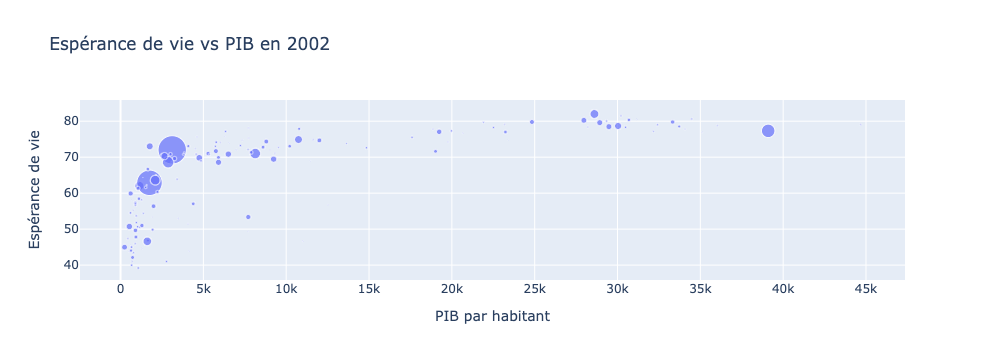

In [116]:
# Créez un graphique en nuages de points pour représenter la relation entre le PIB par habitant et l'espérance de vie en 2002.
fig = px.scatter(data_gapminder.query("year == 2002"), x='gdpPercap', y='lifeExp',
                 size='pop',
                 hover_name='country',
                 title="Espérance de vie vs PIB en 2002",
                 labels={"gdpPercap": "PIB par habitant", "lifeExp": "Espérance de vie"},
                 # text="country",
                )
             
fig.show()

## Graphe avec des lignes

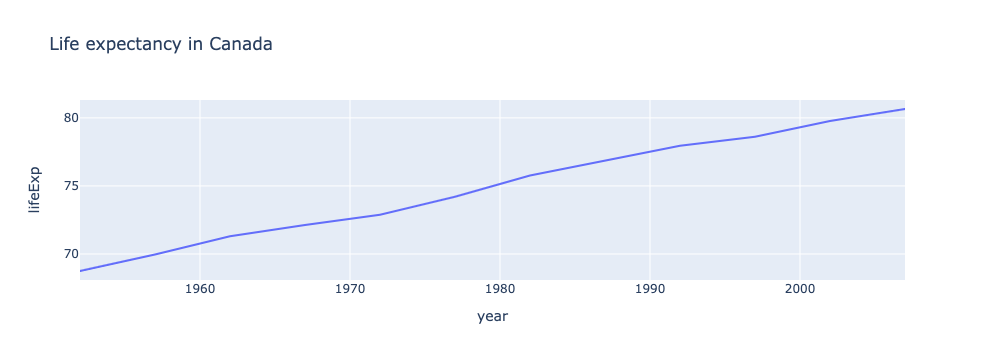

In [117]:
# évolution de l'espérance de vie au Canada
fig = px.line(data_gapminder.query("country=='Canada'"),
              x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

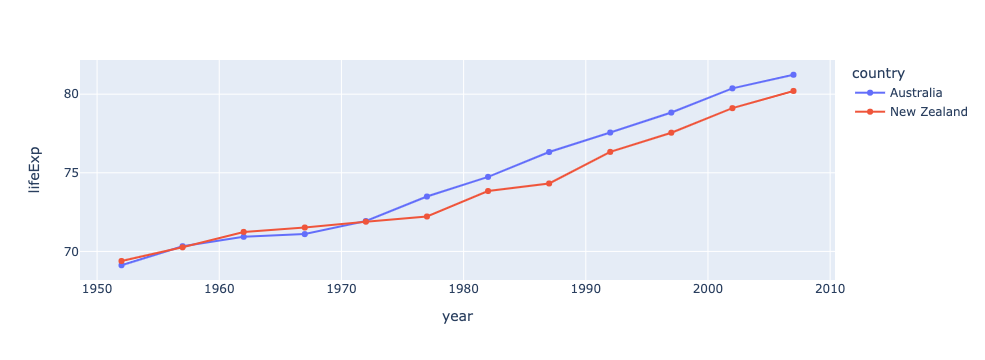

In [24]:
# Espérance de vie dans l'Océanie, par pays
fig = px.line(data_gapminder.query("continent=='Oceania'"),
              x="year", y="lifeExp", color='country',
              markers=True,
             )
fig.show()

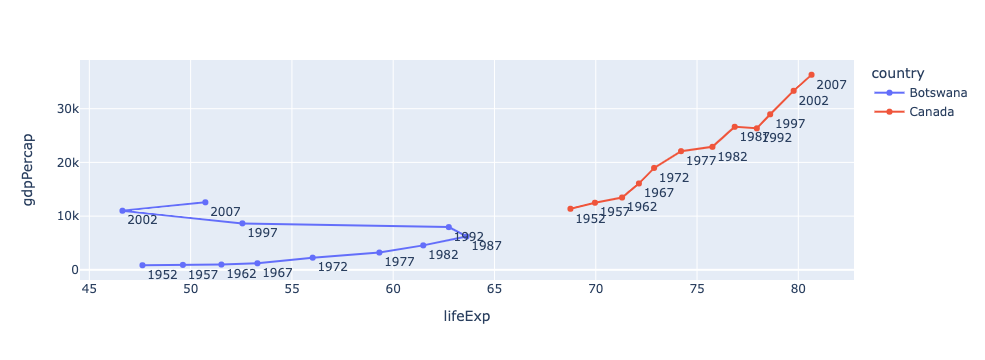

In [25]:
# annotation
fig = px.line(data_gapminder.query("country in ['Canada', 'Botswana']"),
              x="lifeExp", y="gdpPercap", color="country", text="year")

fig.update_traces(textposition="bottom right")

### Exercice

- Créez un graphique en ligne pour suivre l'évolution de la population mondiale au fil des années
- Créez un graphique en ligne pour suivre l'évolution de l'espérance de vie par continent
- ajoutez un titre et changez les noms des axes

**Temps imparti: 15 mins** 

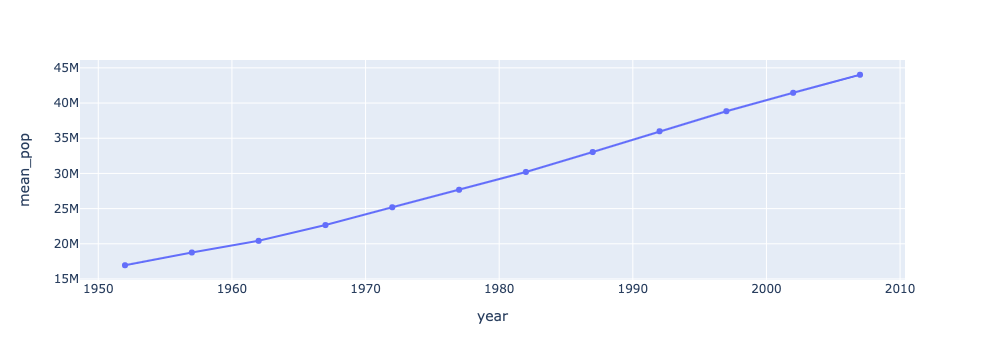

In [120]:
# Créez un graphique en ligne pour suivre l'évolution de la population mondiale au fil des années

# calcul des indicateurs
data_mean_pop_year = data_gapminder.groupby("year", as_index=False).agg(mean_pop=("pop", "mean"))

# Espérance de vie dans l'Océanie, par pays
fig = px.line(data_mean_pop_year,
              x="year", y="mean_pop",
              markers=True,
             )
fig.show()

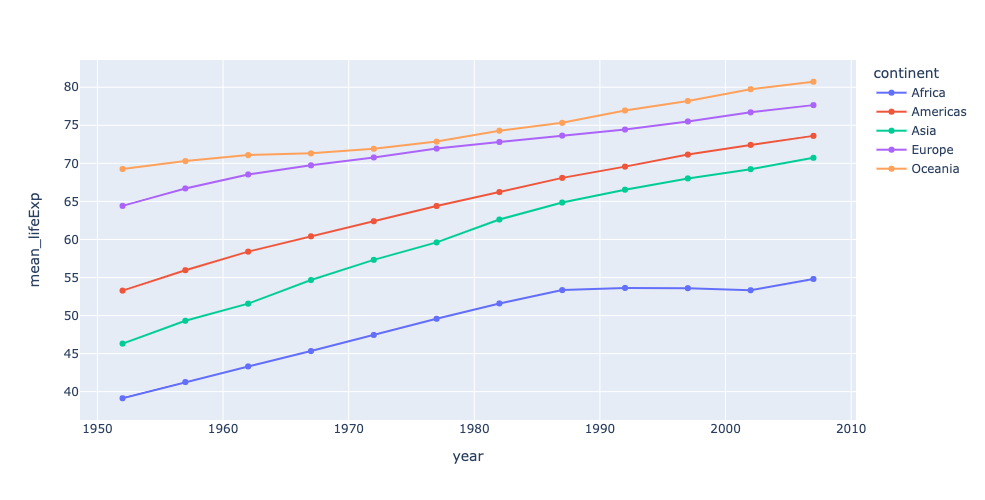

In [139]:
# Créez un graphique en ligne pour suivre l'évolution de l'espérance de vie par continent
data_mean_pop_year_continent = (data_gapminder
                                .groupby(["continent", "year"], as_index=False)
                                .agg(mean_lifeExp=("lifeExp", "mean"))  # moyenne des espérances de vie
                               )
# Espérance de vie moyenne par continent
fig = px.line(data_mean_pop_year_continent,
              x="year", y="mean_lifeExp", color='continent',
              markers=True,
              height=500,
              # text="mean_lifeExp",
              hover_data={'mean_lifeExp':':.2f'}
             )
fig.show()

## Boites à moustache

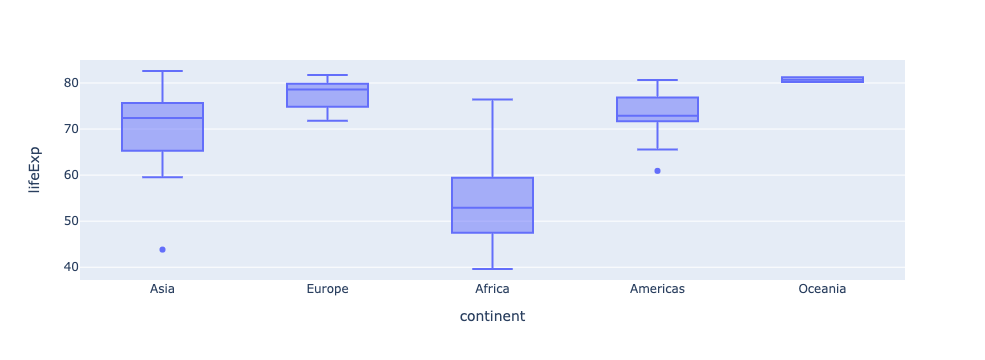

In [26]:
px.box(data_gapminder.query("year == 2007"), x="continent", y="lifeExp")

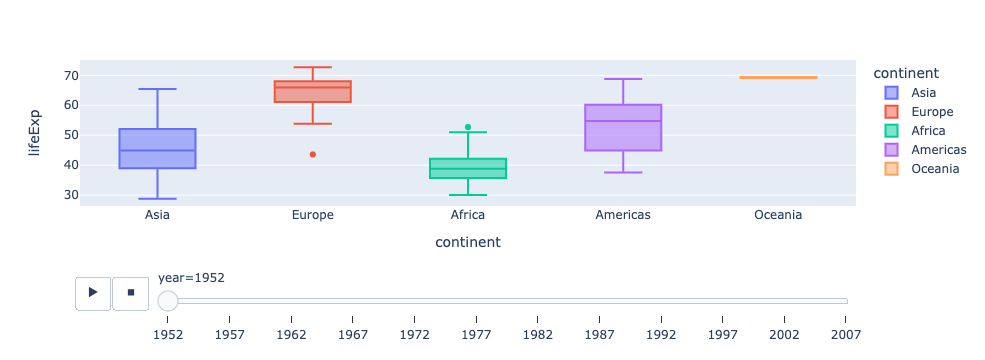

In [27]:
# ajouter une animation
px.box(data_gapminder, x="continent", y="lifeExp",
       color="continent",
       animation_frame="year",
      )

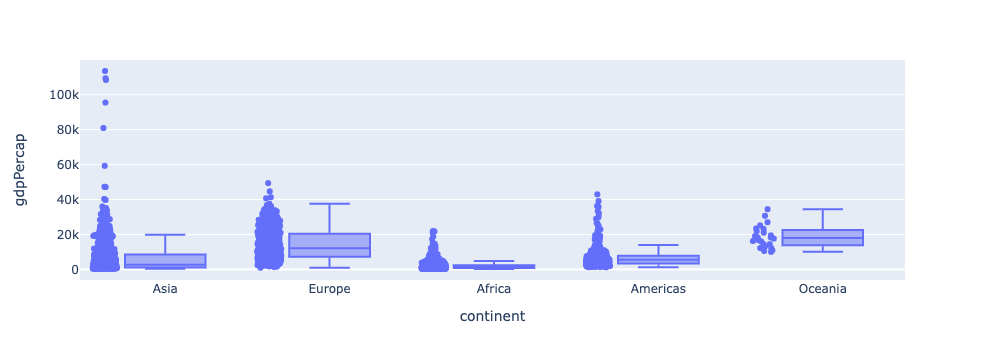

In [28]:
fig = px.box(data_gapminder, x="continent", y="gdpPercap", points="all")
fig.show()

## Camembert

https://plotly.com/python/pie-charts/

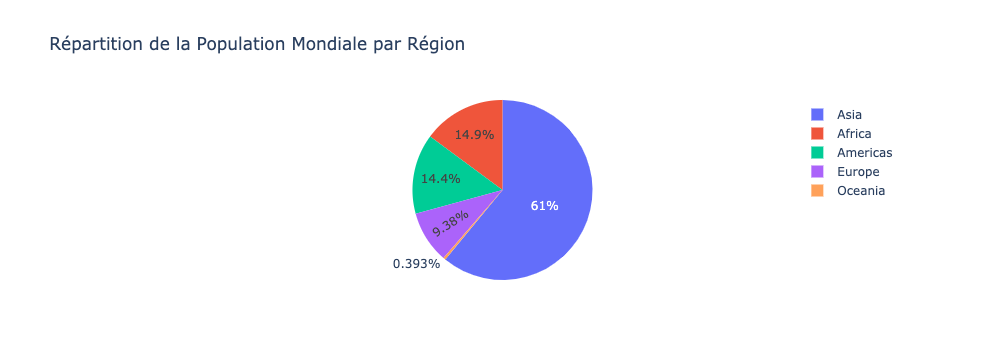

In [30]:
# Regrouper les données par région et calculer la population totale par région
region_population_2007 = (data_gapminder
                          .loc[data_gapminder.year==2007]
                          .groupby("continent", as_index=False)["pop"]
                          .sum()
                         )

# Créer un graphique en camembert (pie chart)
fig = px.pie(region_population_2007, names='continent',
             values='pop',
             title='Répartition de la Population Mondiale par Région',
         
            )
# fig.update_traces(hoverinfo='label+percent', textinfo='value', )
fig.show()

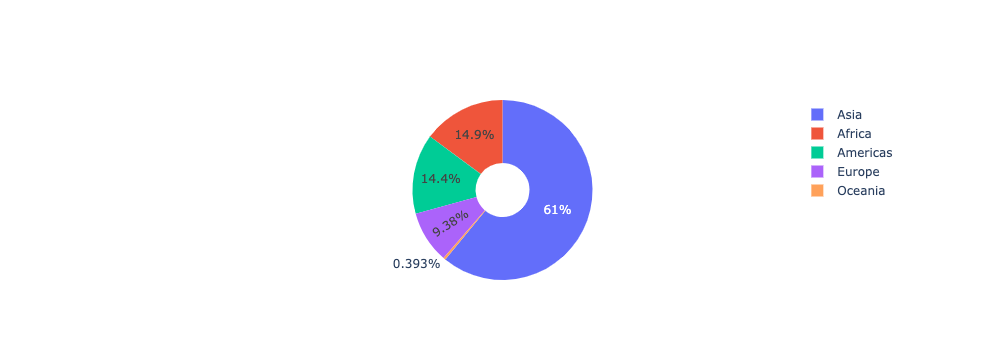

In [31]:
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=tuple(region_population_2007["continent"]),
                             values=tuple(region_population_2007["pop"]),
                             hole=.3)])
fig.show()

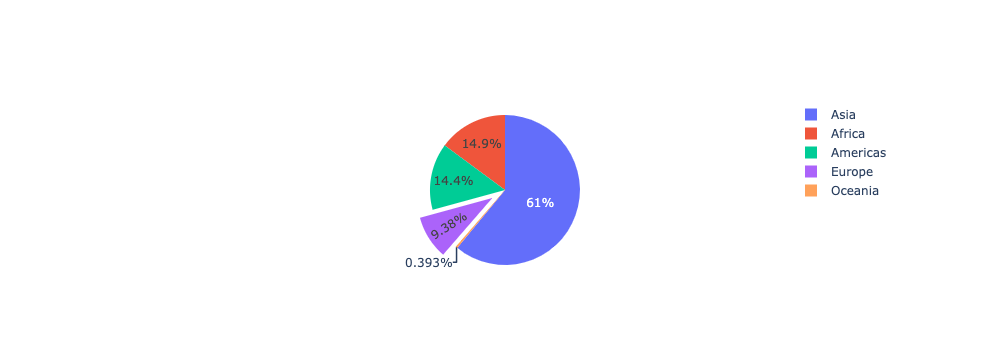

In [32]:
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=tuple(region_population_2007["continent"]),
                             values=tuple(region_population_2007["pop"]), pull=[0, 0, 0, 0.2, 0])])
fig.show()

### Exercice

1. Créez un graphique en camembert pour montrer la répartition de la population mondiale par région.
2. Cangez le titre ainsi que les noms des axes

Conseils: Vous pouvez agréger les données par région et calculer la population totale par région

**Temps imparti: 10 mins** 

# Viz plus complexes

Quand on fait de la visualisation de données sur un jeu de données un peu plus complexe on peut jouer sur 3 (voire 4) éléments:

- Les coordonnées du point (ce que nous avons fait plus haut)
- Son épaisseur
- Sa couleur
- et parfois même la forme du point

Voyons comment élaborer une visualisation plus étoffée avec Plotly. pour celà il nous suffit de rajouter les attributs color et size avec les colonnes à visualiser dans le graphique. On va même rajouter quelques informations supplémentaires dans l’info bulle (population):

## Entonnoir (Funnel)

Le graphique en entonnoir est généralement utilisé pour représenter des étapes de conversion dans un processus

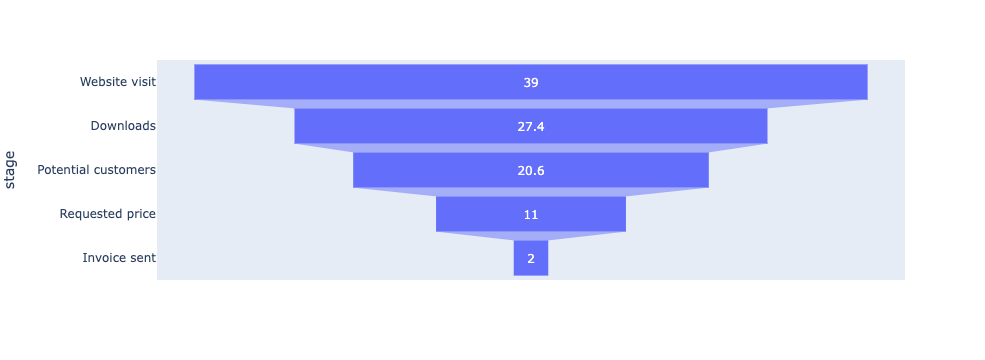

In [33]:
# Voici un exemple basique pour créer un graphique en entonnoir avec les données de conversion d'un site
# Cet exemple crée un graphique en entonnoir fictif avec cinq étapes et des valeurs pour chaque étape (%)

# dictionnaire de données
# definir les étapes
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"]

data_funnel = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=stages)

# graphique
fig = px.funnel(data_funnel, x='number', y='stage')
fig.show()

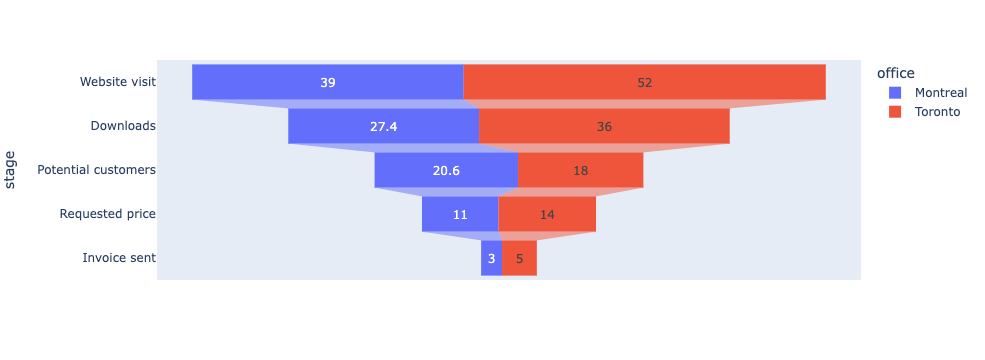

In [34]:
# Diagramme en entonnoir empilé
# données pour Montréal
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 3], stage=stages))
df_mtl['office'] = 'Montreal'

# données pour Toronto
df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14, 5], stage=stages))
df_toronto['office'] = 'Toronto'

# Concaténation
df = pd.concat([df_mtl, df_toronto], axis=0)

# Graphiques
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

## Subplots

### Facetting horizontal

Le facetting permet de construire des sous groupes de données, basés sur une des variables de l’observation et de les présenter avec un même système d’axes pour faciliter les comparaisons.

Avec Plotly on peut aussi empiler plusieurs graphes qui vont se décliner automatiquement via une donnée catégorielle par exemple. Pour ce faire, on utilise les paramètres `facet_col` et `facet_row` de px.scatter.

Dans l’exemple ci-dessous, Plotly va créer autant de graphes séparés horizontalement qu’il y a de continent.

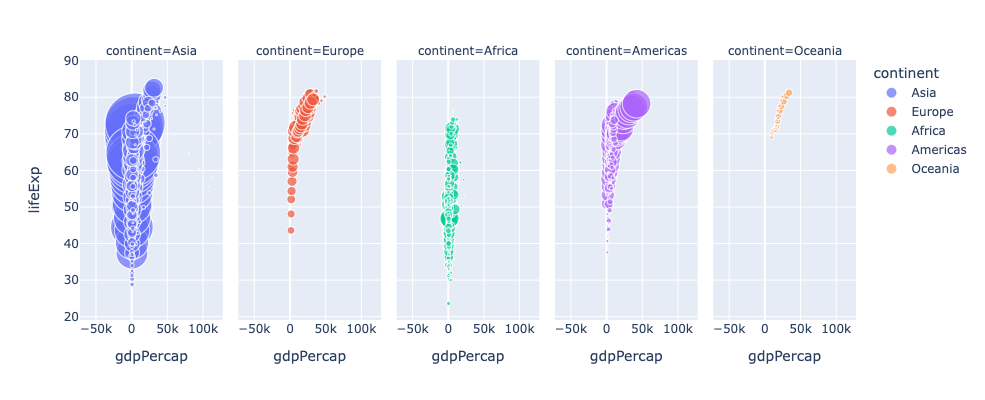

In [35]:
# create a facet plot 
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60, 
                hover_name='country', facet_col='continent', height=400, width=1000)
fig.show() 

### Vertical

L’empilement peut aussi être vertical, on utilise alors l’attribut `facet_row` à la place de `facte_col`

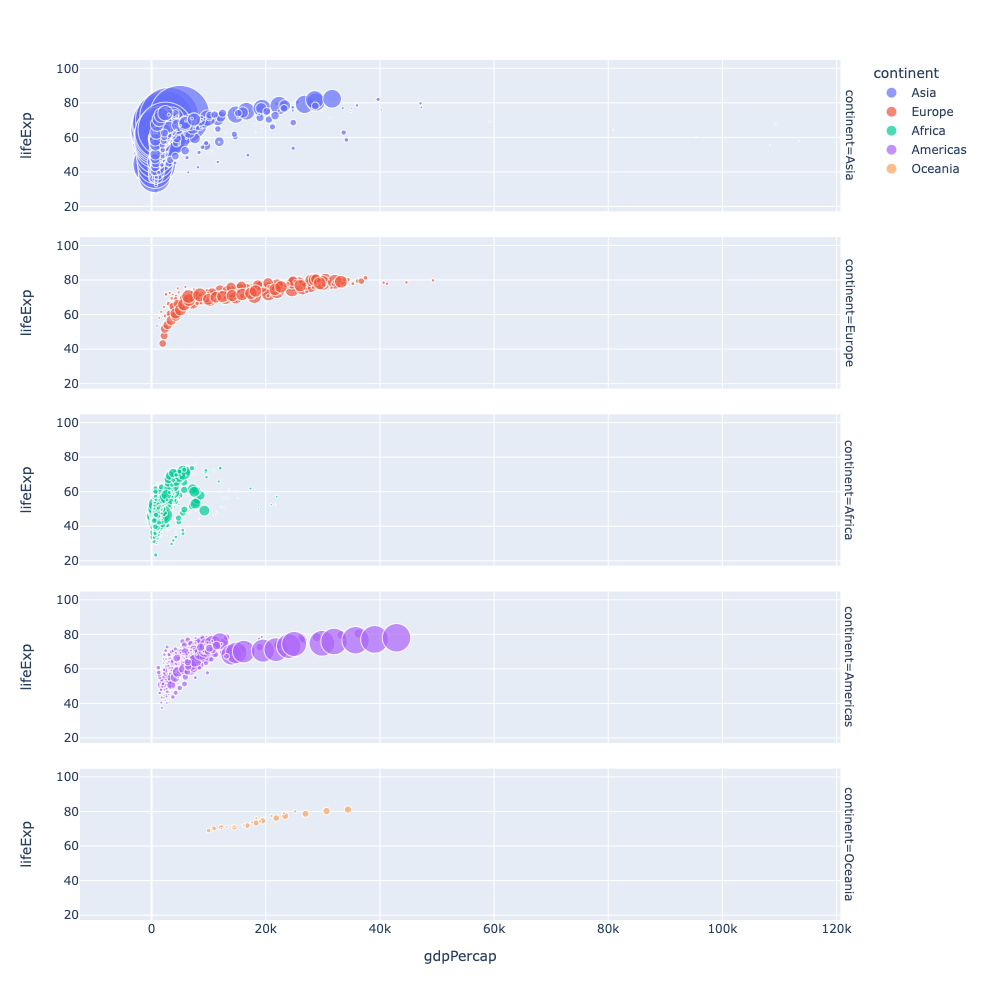

In [36]:
# create a facet plot 
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60, 
                hover_name='country', facet_row='continent', height=1000, width=900)
fig.show() 

In [37]:
data_gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  centroid_lon  centroid_lat  
0        4          65.0          33.0  
1        4          65.0          33.0  
2        4          65.0          33.0  
3        4          65.0          33.0  
4        4          65.0          33.0

### Grilles
Pour terminer il peut être vraiment très utile dés lors que les echelles sont trop différentes par exemple d’afficher des graphes différents sous forme de grilles. Une fois de plus Plotly s’avère très efficace dans cet exercice. Il suffit de créer un objet subplot via make_suplot, de lui définir les dimensions de la grille, puis d’y affecter des visualisations:

In [38]:
# sous ensemble de données en 2007 et Europe
gapminder_europe_2007 = data_gapminder.query("continent == 'Europe' and year == 2007")

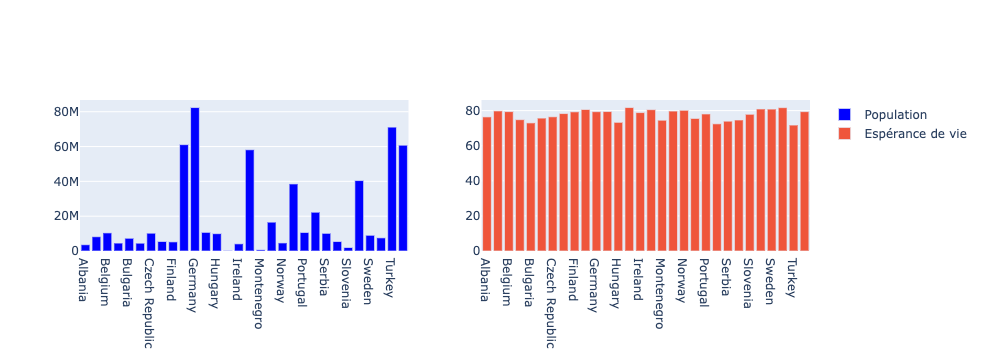

In [39]:
fig = make_subplots(rows=1, cols=2)
 
fig.add_bar(x=gapminder_europe_2007["country"],
            y=gapminder_europe_2007["pop"],
            marker=dict(color="Blue"),
            name="Population",
            row=1,
            col=1)
 
fig.add_bar(x=gapminder_europe_2007["country"],
            y=gapminder_europe_2007["lifeExp"],
            # marker=dict(size=15, color="Blue"),
            # mode="markers",
            name="Espérance de vie", 
            row=1, 
            col=2)
 
fig.show()

## Animation

Construire une représentation graphique fortement interactive, nécessite la création de dashboards. Cependant, Plotly permet de produire des animations élémentaires.

Les paramètres `animation_frame` et `animation_group` sont utilisés :

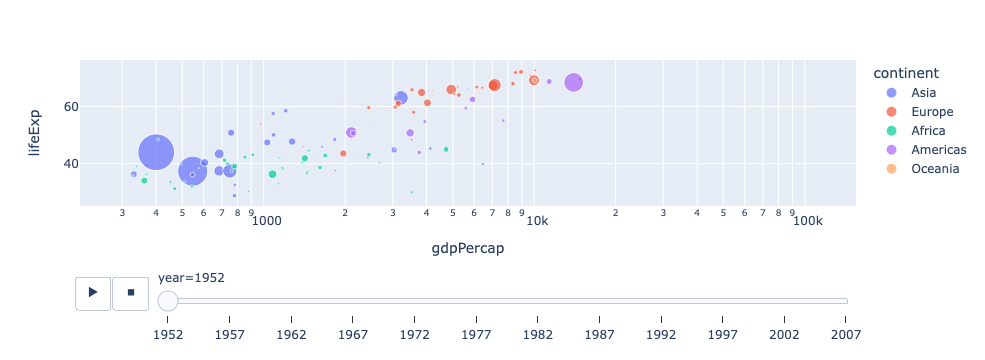

In [40]:
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp', color='continent',
                 size='pop', size_max=40, 
                 hover_name='country',
                 log_x=True,
                 animation_frame='year', animation_group='country',
                )
fig.show()

## Les couleurs

On peut choisir de représenter les données par des couleurs, et selon la nature des données à représenter on choisira :

- une palette de couleurs continues : [Built-in Continuous Color Scales in Python](https://plotly.com/python/builtin-colorscales/) pour représenter des variables numériques. L’interpolation est possible pour représenter les valeurs intermédiaires.

- ou une palette de couleurs discrètes : [Discrete Colors in Python](https://plotly.com/python/discrete-color/) pour représenter des variables catégorielles. Aucune interpolation n’est possible.

Dans notre cas on est intéressé par le choix de 5 couleurs discrètes, pour représenter chacun des 5 variables catégorielles que sont les continents. La palette utilisée par défaut est `px.colors.qualitative.Plotly`. On peut modifier ce choix avec le paramètre `color_discrete_sequence`.

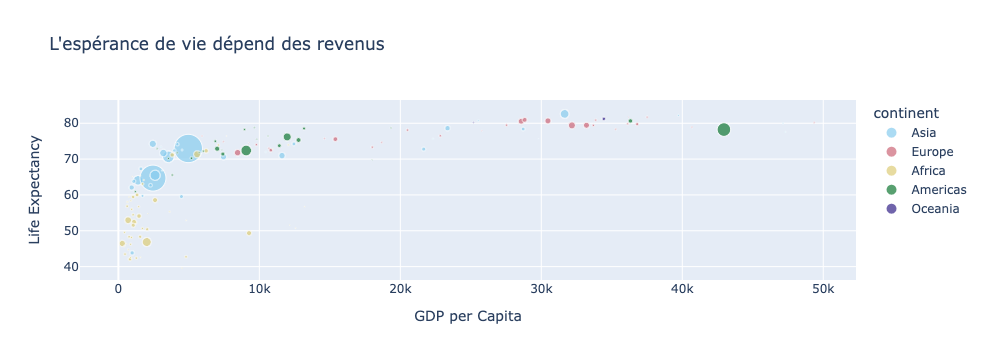

In [41]:
fig = px.scatter(data_gapminder.query("year == 2007"),
                 x="gdpPercap", y="lifeExp", color="continent",
                 size="pop", hover_name="country",
                 labels={'gdpPercap':'GDP per Capita', 'lifeExp':'Life Expectancy'},
                 color_discrete_sequence = px.colors.qualitative.Safe,
                 title="L'espérance de vie dépend des revenus")
fig.show()

## Personnalisation: étiquettes

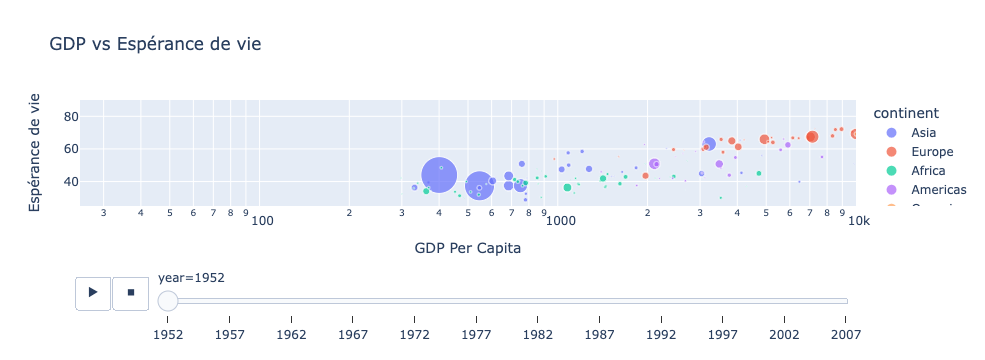

In [42]:
# customize the labels and range pour x et y
fig = px.scatter(data_gapminder, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=40, 
                 hover_name='country',log_x=True, animation_frame='year',
                 animation_group='country', range_x=[25, 10000], range_y=[25, 90],
                 title="GDP vs Espérance de vie",
                 labels=dict(pop="Population", gdpPercap="GDP Per Capita", lifeExp="Espérance de vie"))
fig.show()

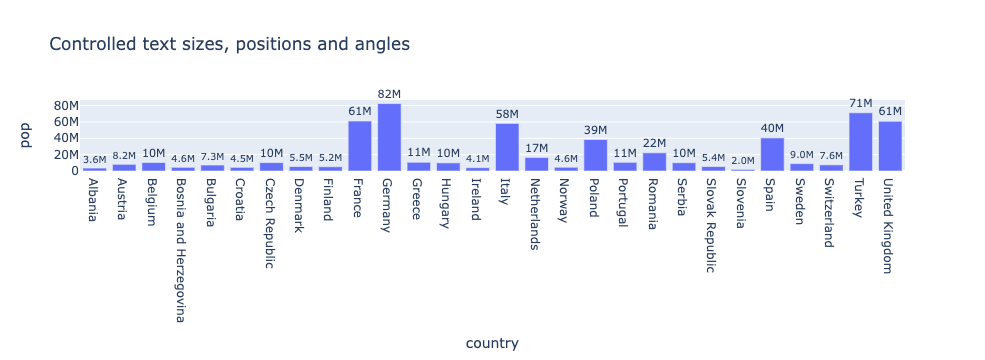

In [43]:
fig = px.bar(data_gapminder.query("continent == 'Europe' and year == 2007 and pop > 2.e6"),
             y='pop', x='country', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## Données géographiques

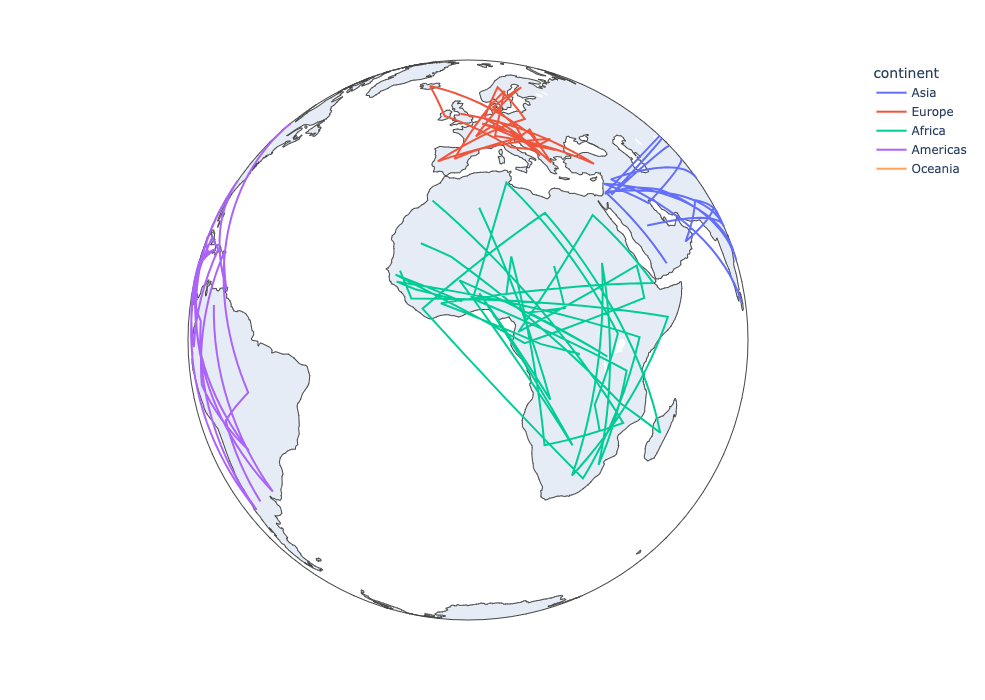

In [44]:
# create a map using line_geo()
fig = px.line_geo(data_gapminder.query('year == 2007'),
                  locations='iso_alpha',
                  color='continent',
                  projection='orthographic',
                  width=700,
                  height=700,
                 )
fig.show() 

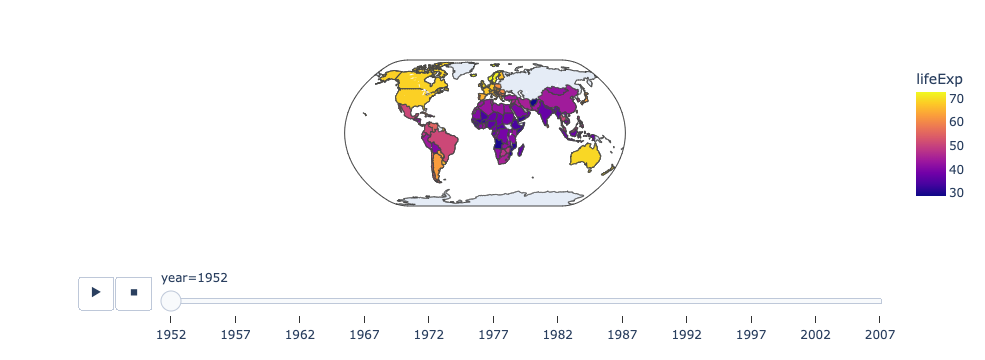

In [45]:
# create a map using choropleth
fig = px.choropleth(data_gapminder, locations='iso_alpha', color='lifeExp', hover_name='country', 
                    animation_frame='year',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection='natural earth',
                   )
fig.show() 

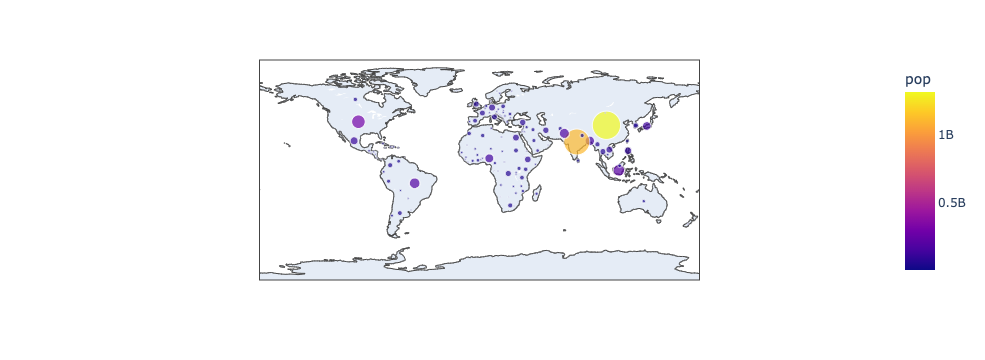

In [46]:
fig = px.scatter_geo(data_gapminder.query("year == 2007"),
                     locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
                     hover_data=["country", "gdpPercap", "lifeExp"],
                     color="pop",
                     )
fig.show()

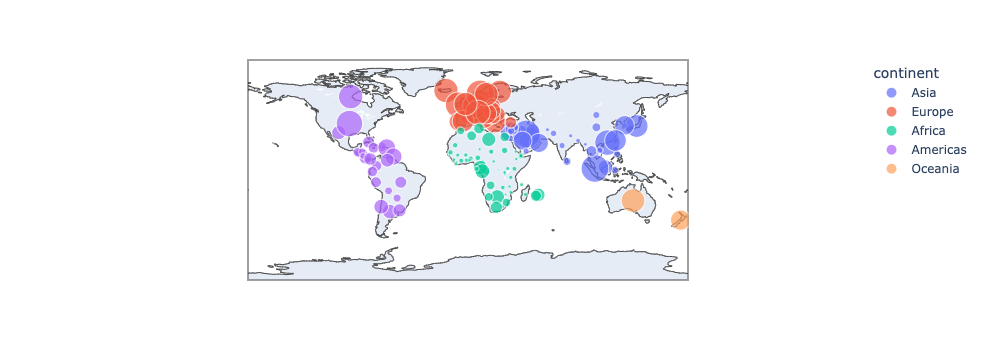

In [47]:
fig = px.scatter_geo(data_gapminder.query("year == 2007"),
                     lat="centroid_lat",
                     lon="centroid_lon",
                     size="gdpPercap",
                     color="continent",
                    )
fig.show()
